## Pandas plots and basic cheatsheet 

In [1]:
import pandas as pd

In [2]:
series1 = pd.Series(range(5))

In [3]:
series1

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [6]:
series1 = pd.Series({"Arun":1, "Kumar": 2, "Marria":3})
series1[0]

1

In [7]:
series1.index

Index(['Arun', 'Kumar', 'Marria'], dtype='object')

In [8]:
series2 = pd.Series({"test":1, "test4": 2, "test5":3})

In [15]:
pd.concat([series1, series2], axis =0).index

Index(['Arun', 'Kumar', 'Marria', 'test', 'test4', 'test5'], dtype='object')

In [16]:
df = pd.DataFrame({'A':series1, 'B':series2})

In [17]:
df

A    B
Arun    1.0  NaN
Kumar   2.0  NaN
Marria  3.0  NaN
test    NaN  1.0
test4   NaN  2.0
test5   NaN  3.0

In [20]:
import numpy as np

In [22]:
np.random.rand(7,5)

array([[0.15591726, 0.11339832, 0.70637492, 0.07111894, 0.94745205],
       [0.28336929, 0.52282859, 0.75274475, 0.07714936, 0.13449084],
       [0.59163059, 0.26029844, 0.13260847, 0.09013614, 0.65831663],
       [0.65623043, 0.32263806, 0.63456363, 0.28034044, 0.36418858],
       [0.22786647, 0.9377123 , 0.71050196, 0.3738614 , 0.40177893],
       [0.13552338, 0.73770495, 0.13079287, 0.56217232, 0.49151713],
       [0.41875057, 0.26971289, 0.86807711, 0.7500059 , 0.62895686]])

In [24]:
np.random.randint(10,20, 4)

array([11, 15, 11, 18])

Working with whole dataframe

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Arun to test5
Data columns (total 2 columns):
A    3 non-null float64
B    3 non-null float64
dtypes: float64(2)
memory usage: 144.0+ bytes


In [26]:
df.describe()

A    B
count  3.0  3.0
mean   2.0  2.0
std    1.0  1.0
min    1.0  1.0
25%    1.5  1.5
50%    2.0  2.0
75%    2.5  2.5
max    3.0  3.0

In [30]:
import requests

In [32]:
request = requests.get("http://seanlahman.com/files/database/lahman-csv_2015-01-24.zip")

In [34]:
from io import BytesIO
import zipfile

In [35]:
zf = zipfile.ZipFile(BytesIO(request.content), 'r')

In [40]:
salaries = pd.read_csv(zf.open("Salaries.csv"))

In [42]:
salaries.head()

yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000

In [53]:
salaries[salaries.yearID>2000].head()

yearID teamID lgID   playerID   salary
13099    2001    ANA   AL  anderga01  4500000
13100    2001    ANA   AL  barteki01   270000
13101    2001    ANA   AL  disarga01   320000
13102    2001    ANA   AL  eckstda01   200000
13103    2001    ANA   AL  erstada01  3450000

In [56]:
salaries.loc[4, 'yearID']

1985

In [57]:
df = salaries.copy()

In [92]:
df.select(lambda x: not x%5).head()

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.


yearID teamID lgID   playerID   salary
0     1985    ATL   NL  barkele01   870000
5     1985    ATL   NL  chambch01   800000
10    1985    ATL   NL  hornebo01  1500000
15    1985    ATL   NL  murphda05  1625000
20    1985    ATL   NL  suttebr01  1354167

In [60]:
df.sort_index(ascending=False).head()

yearID teamID lgID   playerID    salary
24757    2014    WAS   NL  zimmery01  14000000
24756    2014    WAS   NL  zimmejo02   7500000
24755    2014    WAS   NL  werthja01  20000000
24754    2014    WAS   NL  strasst01   3975000
24753    2014    WAS   NL  storedr01   3450000

In [64]:
df.head()

yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000

In [65]:
df_grouped = df.groupby

In [71]:
df_grouped.get_group(1985).head()

yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000

In [74]:
df_grouped.sum().index

Int64Index([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
            1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='yearID')

In [93]:
pd.Timestamp('2015-10-25')

AttributeError: 'Timestamp' object has no attribute 'dt'

In [77]:
pd.Period('2015-10-25','M')

Period('2015-10', 'M')

In [78]:
ts = ['2015-10-25', '2015-10-26']

In [82]:
s=pd.to_datetime(pd.Series(ts))

In [96]:
s.dt.month

0    10
1    10
dtype: int64

In [84]:
s.dt.to_period('M')

0    2015-10
1    2015-10
dtype: period[M]

In [86]:
dr = pd.date_range('2015-10-25', '2015-10-31', freq='D')

In [87]:
dr

DatetimeIndex(['2015-10-25', '2015-10-26', '2015-10-27', '2015-10-28',
               '2015-10-29', '2015-10-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='D')

In [90]:
pd.period_range('2015-10-25', '2015-12-31', freq='M')

PeriodIndex(['2015-10', '2015-11', '2015-12'], dtype='period[M]', freq='M')

## Plotting

In [97]:
import matplotlib.pyplot as plt

In [98]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_autogen_docstring',
 '_backend_mod',
 '_get_running_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 '_string_to_bool',
 'acorr',
 'angle_spec

In [99]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [100]:
plt.style.use('ggplot')

In [101]:
a = np.random.normal(0,1,999) 
b = np.random.normal(1,2,999) 
c = np.random.normal(2,3,999) 
df = pd.DataFrame([a,b,c]).T 
df.columns =['A', 'B', 'C']

In [104]:
a.shape

(999,)

In [105]:
df.head()

A         B         C
0 -0.372428  4.903199  2.268364
1 -0.522932  2.785517  0.312282
2  0.324734  1.301020 -2.905095
3  2.457687 -1.710452  0.461766
4 -0.260352 -3.390786 -1.063713

In [106]:
df1 = df.cumsum()

In [107]:
df1.head()

A         B         C
0 -0.372428  4.903199  2.268364
1 -0.895360  7.688715  2.580646
2 -0.570626  8.989735 -0.324449
3  1.887061  7.279283  0.137316
4  1.626709  3.888497 -0.926397

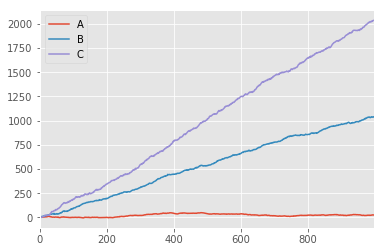

In [122]:
line_plot = df1.plot()

In [110]:
dir(line_plot)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_m

In [123]:
line_plot.set_title("My plot title")
line_plot.set_xlabel("This is x axis")
line_plot.set_ylabel("This is y axis")

Text(3.200000000000003, 0.5, 'This is y axis')

In [113]:
line_plot

In [115]:
plt.close()

In [116]:
line_plot

In [124]:
fig=line_plot.figure
fig.set_size_inches(8, 3)
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)

In [125]:
plt.close()

In [126]:
line_plot

In [121]:
print(line_plot)

AxesSubplot(0.0733507,0.125;0.903212x0.8125)


In [128]:
df1 = df.cumsum()
ax = df1.plot()
# from here down – standard plot output
ax.set_title('Title')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
fig = ax.figure 
fig.set_size_inches(8, 3)
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)
plt.close()

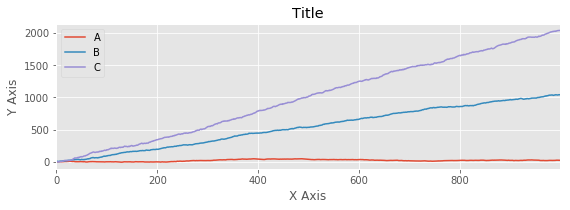

In [130]:
fig

Boxplot

In [133]:
ax=df.plot.box()
ax.set_title('Title')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
fig = ax.figure 
fig.set_size_inches(8, 3)
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)
plt.close()

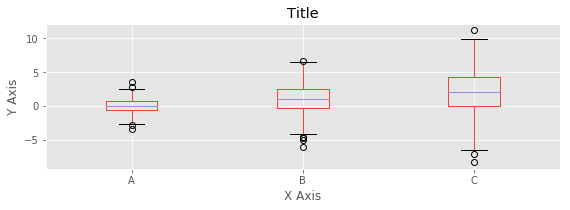

In [134]:
fig

Histogram

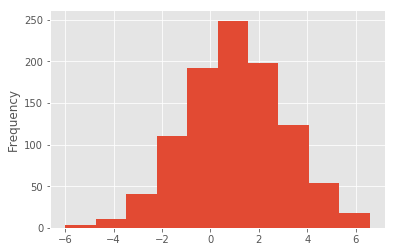

In [139]:
df['B'].plot.hist()

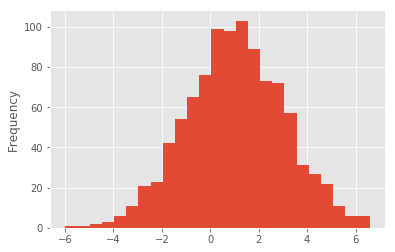

In [140]:
df['B'].plot.hist(bins = 25)

Multiple histograms

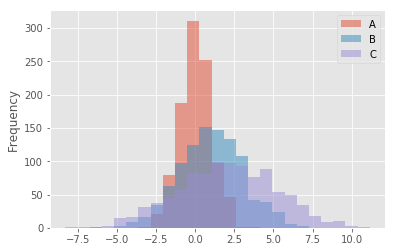

In [142]:
df.plot.hist(bins =25, alpha =0.5)

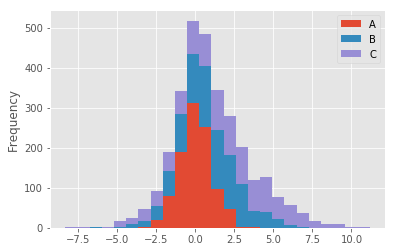

In [143]:
df.plot.hist(bins =25, stacked =True)

Bar plots

In [146]:
import numpy as np

In [148]:
bins = np.linspace(-10,15,26) ## returns evenly spaced numbers over specified intervals

In [154]:
bins

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.])

In [170]:
binned = pd.DataFrame()
for x in df.columns:
    y=pd.cut(df[x],bins,labels=bins[:-1])
    y=y.value_counts().sort_index()
    binned = pd.concat([binned,y],axis=1)
binned

A    B    C
-10.0    0    0    0
-9.0     0    0    1
-8.0     0    0    1
-7.0     0    0    1
-6.0     0    2    5
-5.0     0    5   15
-4.0     1   17   38
-3.0    22   43   46
-2.0   130   95   64
-1.0   340  135   84
 0.0   345  195  109
 1.0   128  193  120
 2.0    32  145  131
 3.0     1   92  105
 4.0     0   50  105
 5.0     0   21   72
 6.0     0    6   52
 7.0     0    0   26
 8.0     0    0   16
 9.0     0    0    7
 10.0    0    0    0
 11.0    0    0    1
 12.0    0    0    0
 13.0    0    0    0
 14.0    0    0    0

In [171]:
binned.index

CategoricalIndex([-10.0,  -9.0,  -8.0,  -7.0,  -6.0,  -5.0,  -4.0,  -3.0,
                   -2.0,  -1.0,   0.0,   1.0,   2.0,   3.0,   4.0,   5.0,
                    6.0,   7.0,   8.0,   9.0,  10.0,  11.0,  12.0,  13.0,
                   14.0],
                 categories=[-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, ...], ordered=True, dtype='category')

In [172]:
binned.index = binned.index.astype(float)
binned.index += (np.diff(bins) / 2.0)

In [173]:
binned.index

Float64Index([-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,
               1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
              12.5, 13.5, 14.5],
             dtype='float64')

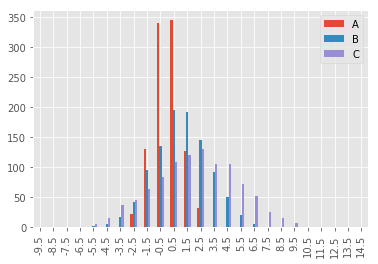

In [174]:
binned.plot.bar()

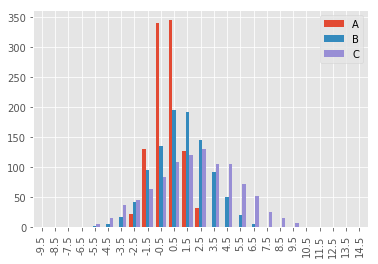

In [177]:
binned.plot.bar(width =0.8, stacked= False)

Horizontal Bars

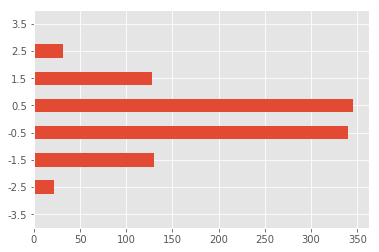

In [182]:
binned['A'][(binned.index >= -4) & (binned.index <= 4)].plot.barh()

Density plot

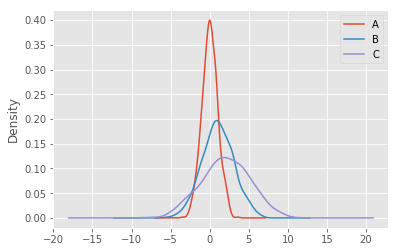

In [183]:
df.plot.kde()

Scatter plot

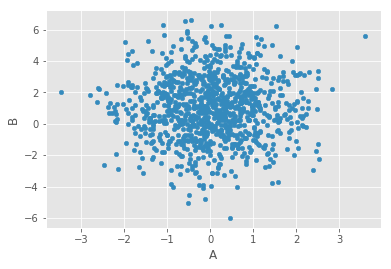

In [189]:
df.plot.scatter('A', 'B')

Pie chart

In [190]:
s = pd.Series(data=[10, 20, 30],
index = ['dogs', 'cats', 'birds'])

In [191]:
s

dogs     10
cats     20
birds    30
dtype: int64

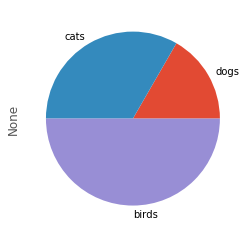

In [192]:
s.plot.pie()

In [196]:
ax=s.plot.pie(autopct ='%.1f')

# followed by the standard plot output ... 
ax.set_title('Pie Chart')
ax.set_aspect(1) # make it round ax.set_ylabel('') # remove default
fig = ax.figure
fig.set_size_inches(8, 3)
fig.savefig('filename.png', dpi=125)
plt.close(fig)

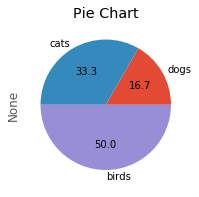

In [197]:
fig

Add a footnote to the chart

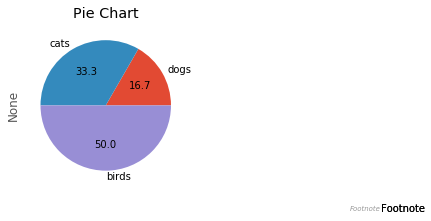

In [202]:
fig.text(0.99,0.01,'Footnote',ha='right', va='bottom', fontsize='x-small', fontstyle='italic', color='#999999')
fig

Line and bar chart on same plot

In [207]:
s =pd.Series(np.random.normal(1.02,0.015,40))
s.head()

0    1.016007
1    0.994130
2    1.027007
3    1.017750
4    1.001846
dtype: float64

In [210]:
s = s.cumprod()
s.head()

0    1.016007
1    1.026210
2    1.064509
3    1.123838
4    1.188664
dtype: float64

In [218]:
dfg = (pd.concat([s / s.shift(1),s / s.shift(4)], axis=1) * 100) - 100 
dfg.columns =['Quarter', 'Annual']
dfg.head()

Quarter     Annual
0       NaN        NaN
1  1.004298        NaN
2  3.732078        NaN
3  5.573345        NaN
4  5.768238  16.993702

In [219]:
dfg.index = pd.period_range('2010-Q1',periods=len(dfg), freq='Q')
dfg.index

PeriodIndex(['2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
             '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4',
             '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
             '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
             '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
             '2019Q1', '2019Q2', '2019Q3', '2019Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [220]:
dfg.head()

Quarter     Annual
2010Q1       NaN        NaN
2010Q2  1.004298        NaN
2010Q3  3.732078        NaN
2010Q4  5.573345        NaN
2011Q1  5.768238  16.993702

In [221]:
# reindex with integers from 0; keep old 
old = dfg.index
dfg.index = range(len(dfg))
dfg.head()

Quarter     Annual
0       NaN        NaN
1  1.004298        NaN
2  3.732078        NaN
3  5.573345        NaN
4  5.768238  16.993702

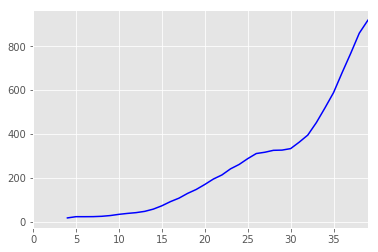

In [225]:
## line plot
ax=dfg['Annual'].plot(color='blue',
label='Year/Year Growth')

In [226]:
dfg['Quarter'].plot.bar(ax=ax,
    label='Q/Q Growth', width=0.8)

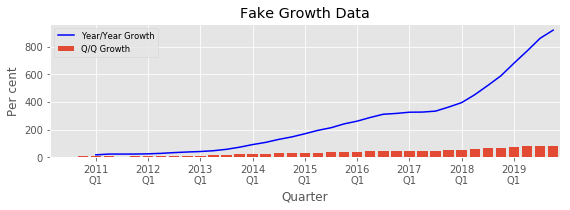

In [236]:
ticks = dfg.index[((dfg.index+0)%4)==0]
labs = pd.Series(old[ticks]).astype(str)
ax.set_xticks(ticks)
ax.set_xticklabels(labs.str.replace('Q',
    '\nQ'), rotation=0)
# fix the range of the x-axis ... skip 1st a
ax.set_xlim([0.5,len(dfg)-0.5])
# add the legend 
l=ax.legend(loc='best',fontsize='small')
# finish off and plot in the usual manner 
ax.set_title('Fake Growth Data') 
ax.set_xlabel('Quarter') 
ax.set_ylabel('Per cent')

fig = ax.figure
fig.set_size_inches(8, 3)
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)
fig

### Working with missing data 

In [238]:
s = pd.Series( [8,None,float('nan'),np.nan])
s

0    8.0
1    NaN
2    NaN
3    NaN
dtype: float64

In [240]:
s.isna()

0    False
1     True
2     True
3     True
dtype: bool

In [241]:
s.isnull()

0    False
1     True
2     True
3     True
dtype: bool

In [242]:
s.fillna(0)

0    8.0
1    0.0
2    0.0
3    0.0
dtype: float64

Missing data in a data frame

In [ ]:
#df = df.dropna() # drop all rows with NaN 
#df = df.dropna(axis=1) # same for cols 
#df=df.dropna(how='all') #drop all NaN row 
#df=df.dropna(thresh=2) 
#drop 2+ NaN in r # only drop row if NaN in a specified col d
#df = df.dropna(df['col'].notnull())

REcoding missing data

In [243]:
#df.fillna(0, inplace=True) # np.nan  0 
#s = df['col'].fillna(0) # np.nan  0 
#df = df.replace(r'\s+', np.nan, regex= True) #whitepace > nan


Non - finite numbers

In [245]:
s = pd.Series([float('inf'), float('-inf'), np.inf, -np.inf])
s

0    inf
1   -inf
2    inf
3   -inf
dtype: float64

In [247]:
np.isfinite(s)

0    False
1    False
2    False
3    False
dtype: bool

### Working with categorical data

In [249]:
s = pd.Series(['a','b','a','c','b','d','a'], dtype='category')
print(s)
df['B'] = df['A'].astype('category')

0    a
1    b
2    a
3    c
4    b
5    d
6    a
dtype: category
Categories (4, object): [a, b, c, d]


In [260]:
s = pd.Series(list('abc'), dtype='category') 
print (s.cat.ordered) 
s

False


0    a
1    b
2    c
dtype: category
Categories (3, object): [a, b, c]

In [265]:
## reorder categories
s.cat.reorder_categories(['c','b','a'])

0    a
1    b
2    c
dtype: category
Categories (3, object): [c, b, a]

In [266]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [268]:
## renaming categoreis

s = pd.Series(list('abc'), dtype='category') 
print(s)
s.cat.categories = [1, 2, 3] # in place
print(s)
s = s.cat.rename_categories([4,5,6])
print(s)

0    a
1    b
2    c
dtype: category
Categories (3, object): [a, b, c]
0    1
1    2
2    3
dtype: category
Categories (3, int64): [1, 2, 3]
0    4
1    5
2    6
dtype: category
Categories (3, int64): [4, 5, 6]


In [269]:
s.cat.categories = ['Group ' + str(i)
for i in s.cat.categories]

In [270]:
s

0    Group 4
1    Group 5
2    Group 6
dtype: category
Categories (3, object): [Group 4, Group 5, Group 6]

Add/remove categories

In [276]:
s.cat.add_categories('Group 7')

0    Group 4
1    Group 5
2    Group 6
dtype: category
Categories (4, object): [Group 4, Group 5, Group 6, Group 7]

In [277]:
s.cat.remove_categories('Group 6')

0    Group 4
1    Group 5
2        NaN
dtype: category
Categories (2, object): [Group 4, Group 5]

In [278]:
s.cat.remove_unused_categories()
 

0    Group 4
1    Group 5
2    Group 6
dtype: category
Categories (3, object): [Group 4, Group 5, Group 6]